# Perfilamiento de datos


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Número máximo de filas a mostar

import pandas_profiling

import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns

import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:

# Ubicación de la base de datos
db_location = r'C:\Users\user\Desktop\Andes\8\bi\datos.csv'

In [ ]:
# Cargar los datos
df_lab=pd.read_csv(db_location, sep=';', encoding = "ISO-8859-1")

In [ ]:
# Ver los datos
display(df_lab.sample(100)) # Muestra
#display(df_bicis.head(5)) # Primeras Filas
#display(df_bicis.tail(5)) # Ultimas Filas

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
7270,7649,10031,tt6043142,movie,Skin,0.0,2018.0,118,6.8,17490.0,5.0,CA,en,imdbDisplay,\N,0.0,Biography,Crime
6973,7349,9666,tt3083008,movie,The Program,0.0,2015.0,99,6.5,18429.0,34.0,CA,en,imdbDisplay,\N,0.0,Biography,Drama
3374,3671,4974,tt2292625,movie,Chakravyuh,0.0,2012.0,152,6.8,3353.0,5.0,IN,en,imdbDisplay,\N,0.0,Action,Drama
6297,6667,8796,tt0924129,movie,Crossing Over,0.0,2009.0,113,6.7,24084.0,31.0,CA,en,imdbDisplay,\N,0.0,Crime,Drama
2428,2718,3788,tt14428598,movie,Qala,0.0,2022.0,119,7.2,6594.0,9.0,IN,en,imdbDisplay,\N,0.0,Drama,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,3969,5339,tt2887954,tvSeries,Tokyo Vice,0.0,2022.0,60,8.0,32936.0,23.0,IN,en,imdbDisplay,\N,0.0,Crime,Drama
6507,6879,9078,tt1325113,tvSeries,Childrens Hospital,0.0,2008.0,11,7.8,8012.0,9.0,CA,en,imdbDisplay,\N,0.0,Comedy,Short
2765,3059,4206,tt1618447,movie,Un amour de jeunesse,0.0,2011.0,110,6.6,5568.0,22.0,IN,en,imdbDisplay,\N,0.0,Drama,Romance
5844,6210,8158,tt0280477,movie,Better Luck Tomorrow,0.0,2002.0,101,7.0,10242.0,12.0,CA,en,imdbDisplay,\N,0.0,Crime,Drama


# Tipos diferentes tipos de las columnas

In [ ]:
df_lab.dtypes

#                    int64
index                int64
tconst              object
titleType           object
originalTitle       object
isAdult            float64
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
main_genre          object
secondary_genre     object
dtype: object

In [ ]:
# Revisemos y pensemos nuevamente en la dimensiones de los datos
df_lab.shape

(7471, 18)

In [ ]:
# Se obtienen las estadísticas principales de las columnas en general sin realizar ningun cambio
# por el momento para los datos anomalos y columnas que no aportan informacion

number_cols = df_lab.dtypes[(df_lab.dtypes == np.int64) | (df_lab.dtypes == np.float64)].index
number_cols = df_lab.select_dtypes(include = ['int','float']).columns
number_cols


Index(['#', 'index', 'isAdult', 'startYear', 'averageRating', 'numVotes',
       'ordering', 'isOriginalTitle'],
      dtype='object')

In [ ]:
#Ahora realizamos lo mismo para las columnas con valor de objeto
object_cols = df_lab.select_dtypes(include=['object']).columns
object_cols

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [ ]:
#Esto se realizo debido a que las columnas con valores numericos no tienen sentido que a los objetos
#se les saque un promedio ya que no son numericos

df_lab[number_cols].describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


In [ ]:
#Ahora vamos a revisar los valores que son categoricos segun el diccinoario pero estan mal puestos
#y tienen un tipo de dato incorrecto

#Variables que deberian ser categoricas
print(df_lab.isAdult.value_counts())




0.0    7470
Name: isAdult, dtype: int64


In [ ]:
#Variables que deberian ser categoricas
print(df_lab.isOriginalTitle.value_counts())

0.0    7470
Name: isOriginalTitle, dtype: int64


In [ ]:
#Variables que deberian ser numericas
print(df_lab.runtimeMinutes.value_counts())

60     534
30     340
45     184
22     138
43     114
      ... 
257      1
228      1
275      1
311      1
460      1
Name: runtimeMinutes, Length: 362, dtype: int64


#### Visualización de Datos


In [ ]:
# Extraemos el número de vehiculos involucrados de acuerdo al número de victimas
df_limit = df_lab[['originalTitle','averageRating']].groupby('originalTitle').sum().sort_values('originalTitle',ascending = False)
df_limit

,averageRating
originalTitle,
ÃÂÃÂ§ Maymun,7.3
ÃÂlÃÂ¼mlÃÂ¼ DÃÂ¼nya,7.6
ÃÂsama Ranking,8.5
ÃÂnibus 174,7.8
ÃÂkami kodomo no Ame to Yuki,8.1
...,...
1,7.9
'Til Death,6.5
$9.99,6.7


Podemos observar que existe un claro error en los datos debido a caracteres irreconocibles donde no se puede distinguir el titulo original de la pelicula


#### Diagrama de cajas


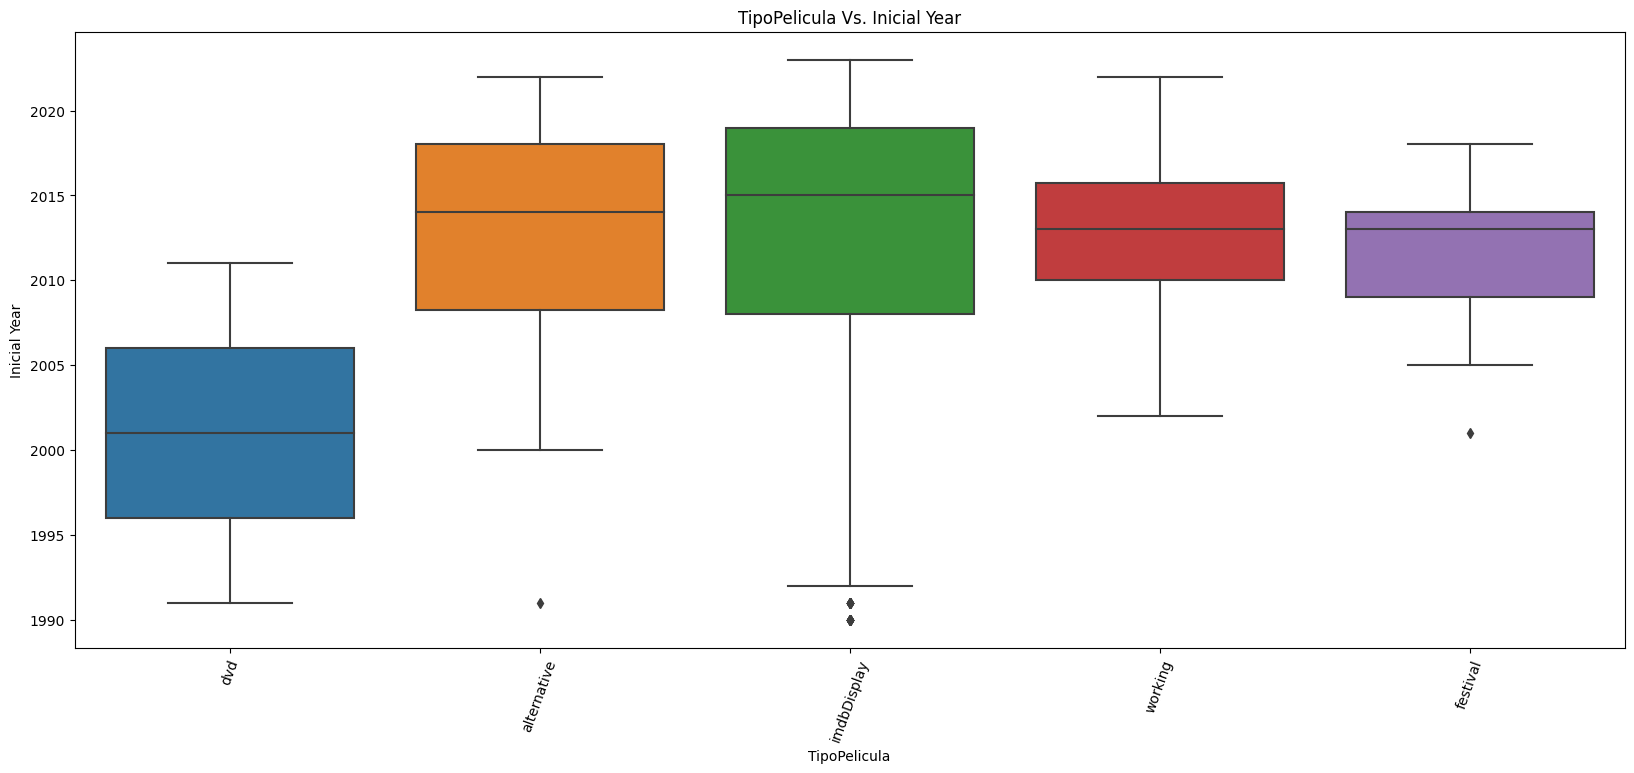

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="types", y="startYear", data=df_lab)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('TipoPelicula Vs. Inicial Year')
plt.xlabel('TipoPelicula')  
plt.ylabel('Inicial Year')  
plt.show()

El diagrama de Cajas nos muestra que se da una homocedasticidad entre los niveles del factor Tipo Pelicula y el "year" dado. 
Indicandonos que de los anios 90 a los 2010 tuvo un auge el dvd. 


Despues de esto existieron nuevos tipos de peliculas que tuvieron menor varianza entre ellas, resaltando que fueron mas utilizadas del 2010 en adelante.

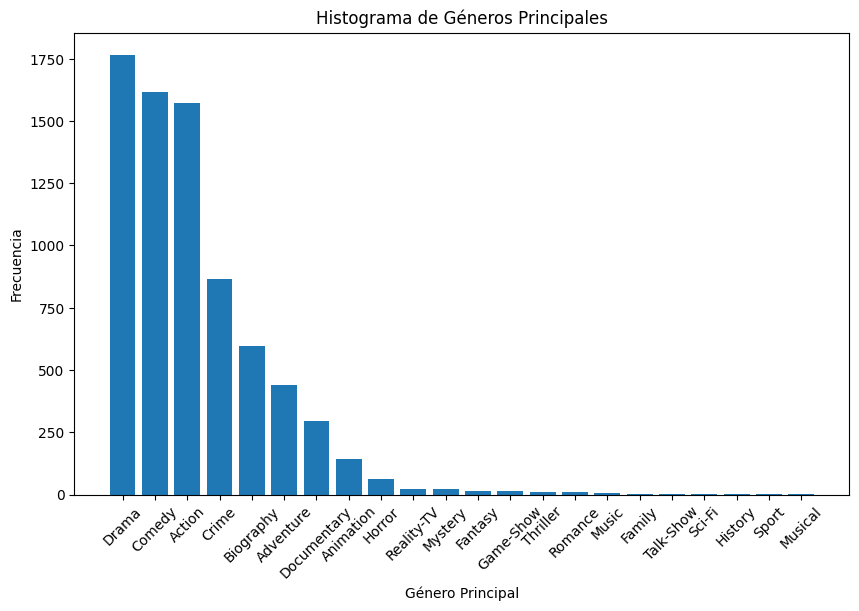

In [ ]:

genre_counts = df_lab['main_genre'].value_counts()

plt.figure(figsize=(10, 6))

plt.bar(genre_counts.index, genre_counts.values)

# Agrega etiquetas y título
plt.xlabel('Género Principal')
plt.ylabel('Frecuencia')
plt.title('Histograma de Géneros Principales')

plt.xticks(rotation=45)

# Muestra el histograma
plt.show()


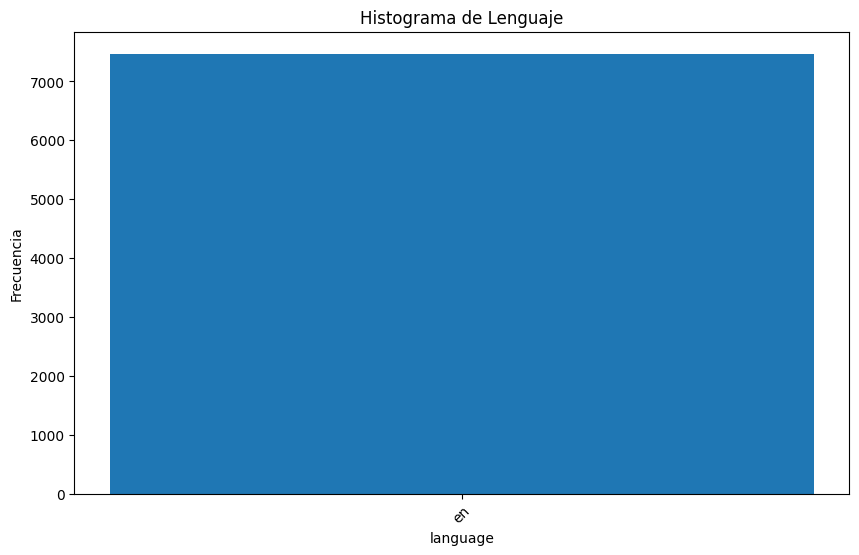

In [ ]:

genre_counts = df_lab['language'].value_counts()

plt.figure(figsize=(10, 6))

plt.bar(genre_counts.index, genre_counts.values)

# Agrega etiquetas y título
plt.xlabel('language')
plt.ylabel('Frecuencia')
plt.title('Histograma de Lenguaje')

plt.xticks(rotation=45)

# Muestra el histograma
plt.show()


Como podemos darnos cuenta encontramos una columna que no nos esta aportando valor porque a pesar de ser una variable categorica solo tiene un nivel del factor

## 3. Análisis de calidad de datos

## 3.1 Completitud
En este punto se identifican si existen problemas de completitud para reportarlos e identificar posibles soluciones que se trabajan en la etapa de preparación de datos


In [ ]:
# Cálculo de porcentaje de valores nulos por columna
((df_lab.isnull().sum()/df_lab.shape[0])).sort_values(ascending=False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

Encontramos trece  columans con el problema de datos  con valores nulos
ordering           
main_genre         
isOriginalTitle  
attributes       
types          
language         
region          
secondary_genre   
averageRating     
runtimeMinutes   
startYear         
isAdult           

In [ ]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_lab.isna().sum()/len(df_lab)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
numVotes,0.013385
ordering,0.013385
main_genre,0.013385
isOriginalTitle,0.013385
attributes,0.013385
types,0.013385
language,0.013385
region,0.013385
secondary_genre,0.013385
averageRating,0.013385


### 3.2 Unicidad


In [ ]:
df_lab.duplicated(keep = False).sum()

6

In [ ]:
# Duplicados parciales en Numericas

for col in number_cols:
    num_duplicated = df_lab.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

#: 4
index: 4
isAdult: 7469
startYear: 7436
averageRating: 7437
numVotes: 657
ordering: 7395
isOriginalTitle: 7469


Esto nos sirve para saber cuales columnas son identificadores que nos nos aportan infomracion y cuales columnas debemos quitar porque son numeros no categoricos que se estan repitiendo
y esto es un problema para el analisis de los datos. Sin embargo, debemos tener en cuenta que no hemos solucionado aun los tipos de datos. Por lo tanto segun el diccionario podriamos decir que tiene sentido que haya duplicados de startYear, isAdult, numVotes, isOriginalTitle, sin embargo se pueden estar escondiendo errores aqui como datos nulos.

In [ ]:
# Duplicados parciales en Objetos

for col in object_cols:
    num_duplicated = df_lab.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

tconst: 5
titleType: 7464
originalTitle: 181
runtimeMinutes: 7108
region: 7466
language: 7469
types: 7465
attributes: 7469
main_genre: 7448
secondary_genre: 7444


### Solucion Completitud y Unicidad

Para solucionarlo realizaremos la eliminacion de las siguientes columnas. Como pudimos observar, existen ciertas columnas con un porcentaje de datos
nulos, ademas algunas de las columnas no nos proporcionan informacion ya que solo tienen un valor o son identificadores. Por lo tanto eliminaremos primero todos los datos que son nulos
debido a que es un porcentaje bajo de los datos.

In [ ]:
#Arreglar los tt iniciales de tconst

df_lab['tconst'] = df_lab['tconst'].str.replace('^tt', '', regex=True)

In [ ]:
# Especificar las columnas en las que deseas buscar valores nulos
columns_to_check = df_lab.columns.tolist()

# Eliminar filas con valores nulos en las columnas especificadas
df_cleaned = df_lab.dropna(subset=columns_to_check)

print(df_cleaned)

         #  index   tconst titleType  \
0        1      1  0103064     movie   
1       10     17  0231050  tvSeries   
2       13     23  0253474     movie   
3       21     55  0369339     movie   
4       28     87  0439547     movie   
...    ...    ...      ...       ...   
7466  7845  10269  9789686     movie   
7467  7846  10270  9814900  tvSeries   
7468  7847  10271  9845110     movie   
7469  7848  10272  9845398     movie   
7470  7849  10274  9908860  tvSeries   

                                          originalTitle  isAdult  startYear  \
0                            Terminator 2: Judgment Day      0.0     1991.0   
1                       ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto      0.0     2000.0   
2                                           The Pianist      0.0     2002.0   
3                                            Collateral      0.0     2004.0   
4     2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...      0.0     2005.0   
...                                          

In [ ]:
# Ver el porcentaje de atributos vacios
df_porcentajes = (100*df_cleaned.isna().sum()/len(df_cleaned)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
#,0.0
index,0.0
main_genre,0.0
isOriginalTitle,0.0
attributes,0.0
types,0.0
language,0.0
region,0.0
ordering,0.0
numVotes,0.0


Como podemos ver ya no hay ningun dato que sea nulo. Por lo tanto, ahora podemos ver que columnas realmente contienen informacion o no para eliminarlas.

## Revision columnas

## "#"

Para la columna "#" no se debe tomar ya que no nos proporciona informacion porque tiene un valor unico para cada dato.

## "Index"


Para la columna "index" no se debe tomar ya que no nos proporciona informacion porque tiene un valor unico para cada dato.

## "main_genre"

Esta columna se debe tener en cuenta ya que nos esta informando de la variablidad del genero de la pelicula

## "isOriginalTitle"

Podemos observar que para todos los datos es el mismo valor, por lo tanto no se debe tomar, no nos aporta informacion.

## "Attributes"

Para esta columna sucede lo mismo que lo anterior, ademas no tiene sentido con el diccionario.

## "Types"

Para estos datos podemos darnos cuenta que hay variabilidad pero hay muy poca, sin embargo lo dejaremos por si algun algoritmo llegase a tener utilidad con este.

## "Language"

El lenguaje no tiene sentido ya que no aporta informacion

## "Region"

La region tiene sentido y tiene variabilidad por lo tanto se tiene en cuenta.

## "Ordering"

La variable no esta ni siquiera en el diccionario, por lo tanto no se toma, ademas no esta para todos los datos.

## "NumVotes"

Esta variable es de las mas importantes porque nos indica que tan buena votacion tuvo la pelicula, tiene mucha variabilidad, se toma.

## "AverageRating"

Al igual que en el numero de votos tambien es muy importante esta variable en el modelo.

## "RunTimeMinutes"

Esta variable tambien tiene mucha variabilidad, tanta que los datos no son capaces de entrar todos en un histograma por esto haremos una revision por si no hay nigun duplicado no tomar la variable puesto que no nos daria informacion alguna.

Una vez revisado esto podemos entender que a pesar de que haya variabilidad alta, se repiten muchos datos y esto nos sirve para analizar mas adelante.

## "StartYear"

Alta variabilidad con repeticion, se cuentan los datos

## "isAdult"

No se tienen en cuenta todos los datos son iguales. No da informacion la variable

## "OriginalTitle"

Viendo la poca repeticion de los datos podemos darnos cuenta que nos va a aportar muy poca informacion por ser un titulo original.

## "TitleType"

Esta variable nos aporta buena informacion para el uso posterior de algoritmos

## "tconst"

Tiene demasiada variabilidad indicandonos que es un dato unico y por tanto no aporta informacion.

## "seconday_genre"

El genero secundario tambien nos aporta un buen valor informativo

In [ ]:
profiling = pandas_profiling.ProfileReport(df_lab)
profiling

ModuleNotFoundError: No module named 'pandas_profiling'

## Eliminar Columnas

Esta seria nuestro data Frame con las columnas innecesarias eliminadas